## About Dataset
The data has been synthetically generated, calculated based on weightings from various studies and sites that currently compute the dependent variable, carbon emissions, attempting to maintain values close to reality.

Feature:

- **Body Type**: Body type.  
- **Sex**: Gender.  
- **Diet**: Diet.  
- **How Often Shower**: Frequency of showering   
- **Heating Energy Source**: Residential heating energy  
- **Transport**: Transportation preference.  
- **Vehicle Type**: Vehicle fuel type.  
- **Social Activity**: Frequency of participating in social activities.  
- **Monthly Grocery Bill**: Monthly amount spent on groceries, in dollars.   
- **Frequency of Traveling by Air**: Frequency of using aircraft in the last month.  
- **Vehicle Monthly Distance Km**: The kilometers traveled by vehicle in the last month.  
- **Waste Bag Size**: Size of the garbage bag  
- **Waste Bag Weekly Count**: The amount of garbage thrown away in the last week.  
- **How Long TV PC Daily Hour**: Daily time spent in front of TV or PC.  
- **How Many New Clothes Monthly**: Number of clothes purchased monthly.  
- **How Long Internet Daily Hour**: Time spent on the Internet daily.  
- **Energy efficiency**: Whether or not you care about purchasing energy efficient devices.  
- **Recycling**: The wastes it recycles.  
- **Cooking_With**: Devices used in cooking  
- **CarbonEmission**: Dependent variable, total carbon emissions.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'Carbon Emission.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial assessment
data.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [3]:
# Step 1: Handle Missing Values
# For the purpose of this initial cleanup, we'll fill missing 'Vehicle Type' values with a placeholder 'unknown'
data['Vehicle Type'].fillna('unknown', inplace=True)

# Step 2: Fix Data Types
# Convert categorical columns to category data type
categorical_columns = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 
                       'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Recycling', 'Cooking_With']
for column in categorical_columns:
    data[column] = data[column].astype('category')

# Confirm changes by displaying data types and checking for missing values
data_types = data.dtypes
missing_values = data.isnull().sum()

data_types, missing_values

(Body Type                        category
 Sex                              category
 Diet                             category
 How Often Shower                 category
 Heating Energy Source            category
 Transport                        category
 Vehicle Type                     category
 Social Activity                  category
 Monthly Grocery Bill                int64
 Frequency of Traveling by Air    category
 Vehicle Monthly Distance Km         int64
 Waste Bag Size                   category
 Waste Bag Weekly Count              int64
 How Long TV PC Daily Hour           int64
 How Many New Clothes Monthly        int64
 How Long Internet Daily Hour        int64
 Energy efficiency                category
 Recycling                        category
 Cooking_With                     category
 CarbonEmission                      int64
 dtype: object,
 Body Type                        0
 Sex                              0
 Diet                             0
 How Often Showe

In [6]:
import ast
data = pd.read_csv(file_path)
# Fill missing 'Vehicle Type' values with 'unknown'
data['Vehicle Type'].fillna('unknown', inplace=True)

# Convert the 'Recycling' and 'Cooking_With' columns from string representations of lists to actual lists
data['Recycling'] = data['Recycling'].apply(ast.literal_eval)
data['Cooking_With'] = data['Cooking_With'].apply(ast.literal_eval)

# Flatten the lists into comma-separated strings
data['Recycling'] = data['Recycling'].apply(lambda x: ','.join(x))
data['Cooking_With'] = data['Cooking_With'].apply(lambda x: ','.join(x))

# Create dummy variables for these transformed columns
recycling_dummies = data['Recycling'].str.get_dummies(sep=',')
cooking_with_dummies = data['Cooking_With'].str.get_dummies(sep=',')

# Concatenate the original data with the new dummy variables
data = pd.concat([data.drop(['Recycling', 'Cooking_With'], axis=1), recycling_dummies, cooking_with_dummies], axis=1)

# Check the first few rows to ensure the changes have been applied correctly
data.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,...,CarbonEmission,Glass,Metal,Paper,Plastic,Airfryer,Grill,Microwave,Oven,Stove
0,overweight,female,pescatarian,daily,coal,public,unknown,often,230,frequently,...,2238,0,1,0,0,0,0,0,1,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,unknown,often,114,rarely,...,1892,0,1,0,0,0,0,1,0,1
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,...,2595,0,1,0,0,0,0,1,1,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,unknown,sometimes,157,rarely,...,1074,1,1,1,1,1,1,1,0,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,...,4743,0,0,1,0,0,0,0,1,0


In [7]:
# Step 4: Standardize Text Columns
# Convert all string columns to lower case for consistency
text_columns = data.select_dtypes(include=['object', 'category']).columns
data[text_columns] = data[text_columns].apply(lambda x: x.str.lower())

# Step 5: Rename Columns
# Replace spaces with underscores and make all column names lowercase for consistency
data.columns = data.columns.str.replace(' ', '_').str.lower()

# Display the updated dataframe to confirm changes
data.head()

,body_type,sex,diet,how_often_shower,heating_energy_source,transport,vehicle_type,social_activity,monthly_grocery_bill,frequency_of_traveling_by_air,...,carbonemission,glass,metal,paper,plastic,airfryer,grill,microwave,oven,stove
0,overweight,female,pescatarian,daily,coal,public,unknown,often,230,frequently,...,2238,0,1,0,0,0,0,0,1,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,unknown,often,114,rarely,...,1892,0,1,0,0,0,0,1,0,1
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,...,2595,0,1,0,0,0,0,1,1,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,unknown,sometimes,157,rarely,...,1074,1,1,1,1,1,1,1,0,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,...,4743,0,0,1,0,0,0,0,1,0


In [8]:
# Summary statistics for numerical columns
numerical_summary = data.describe()

numerical_summary

,monthly_grocery_bill,vehicle_monthly_distance_km,waste_bag_weekly_count,how_long_tv_pc_daily_hour,how_many_new_clothes_monthly,how_long_internet_daily_hour,carbonemission,glass,metal,paper,plastic,airfryer,grill,microwave,oven,stove
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300,0.497900,0.504700,0.49770,0.499700,0.499200,0.499200,0.507300,0.505,0.504100
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247,0.500021,0.500003,0.50002,0.500025,0.500024,0.500024,0.499972,0.500,0.500008
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000,1.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000


In [29]:
data.nunique()

body_type                           4
sex                                 2
diet                                4
how_often_shower                    4
heating_energy_source               4
transport                           3
vehicle_type                        6
social_activity                     3
monthly_grocery_bill              250
frequency_of_traveling_by_air       4
vehicle_monthly_distance_km      4003
waste_bag_size                      4
waste_bag_weekly_count              7
how_long_tv_pc_daily_hour          25
how_many_new_clothes_monthly       51
how_long_internet_daily_hour       25
energy_efficiency                   3
carbonemission                   3509
glass                               2
metal                               2
paper                               2
plastic                             2
airfryer                            2
grill                               2
microwave                           2
oven                                2
stove       

In [20]:
for col in data:
    print(col + ': ')
    print(data[col].unique())

body_type: 
['overweight' 'obese' 'underweight' 'normal']
sex: 
['female' 'male']
diet: 
['pescatarian' 'vegetarian' 'omnivore' 'vegan']
how_often_shower: 
['daily' 'less frequently' 'more frequently' 'twice a day']
heating_energy_source: 
['coal' 'natural gas' 'wood' 'electricity']
transport: 
['public' 'walk/bicycle' 'private']
vehicle_type: 
['unknown' 'petrol' 'diesel' 'hybrid' 'lpg' 'electric']
social_activity: 
['often' 'never' 'sometimes']
monthly_grocery_bill: 
[230 114 138 157 266 144  56  59 200 135 146 111 123 225 219 104 126 288
 282  69 110 165  62  94 259  67 130 258 189 262 280 121 174 173 199  64
 100 240 245 270 294  87 209 124 276  90 136 246 253 281  82  73  98 256
 287  63 158 241 176 214 264 213 125 188 251 285 234  91 118  75 134 202
 223 141 236  95 249  81 291  70  89 198  84 182 275 228 140 232 115 156
 252 162 145 205 178 286 108  76 221 295 177 193 238 101  99  50  71 247
 222  61 137  66 105  80 210 152 260 283 277 203  96 233 147  83  77 254
 207  93  85 13

- ### Identifying Numerical and Categorical Features

In [55]:
numerical_features = data.select_dtypes(include=['int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
print("Numerical features: ")
print(numerical_features)
print("Categorical features: ")
print(categorical_features)

Numerical features: 
Index(['monthly_grocery_bill', 'vehicle_monthly_distance_km',
       'waste_bag_weekly_count', 'how_long_tv_pc_daily_hour',
       'how_many_new_clothes_monthly', 'how_long_internet_daily_hour',
       'carbonemission', 'glass', 'metal', 'paper', 'plastic', 'airfryer',
       'grill', 'microwave', 'oven', 'stove'],
      dtype='object')
Categorical features: 
Index(['body_type', 'sex', 'diet', 'how_often_shower', 'heating_energy_source',
       'transport', 'vehicle_type', 'social_activity',
       'frequency_of_traveling_by_air', 'waste_bag_size', 'energy_efficiency'],
      dtype='object')


- ### What is the distribution of Carbon Emission?

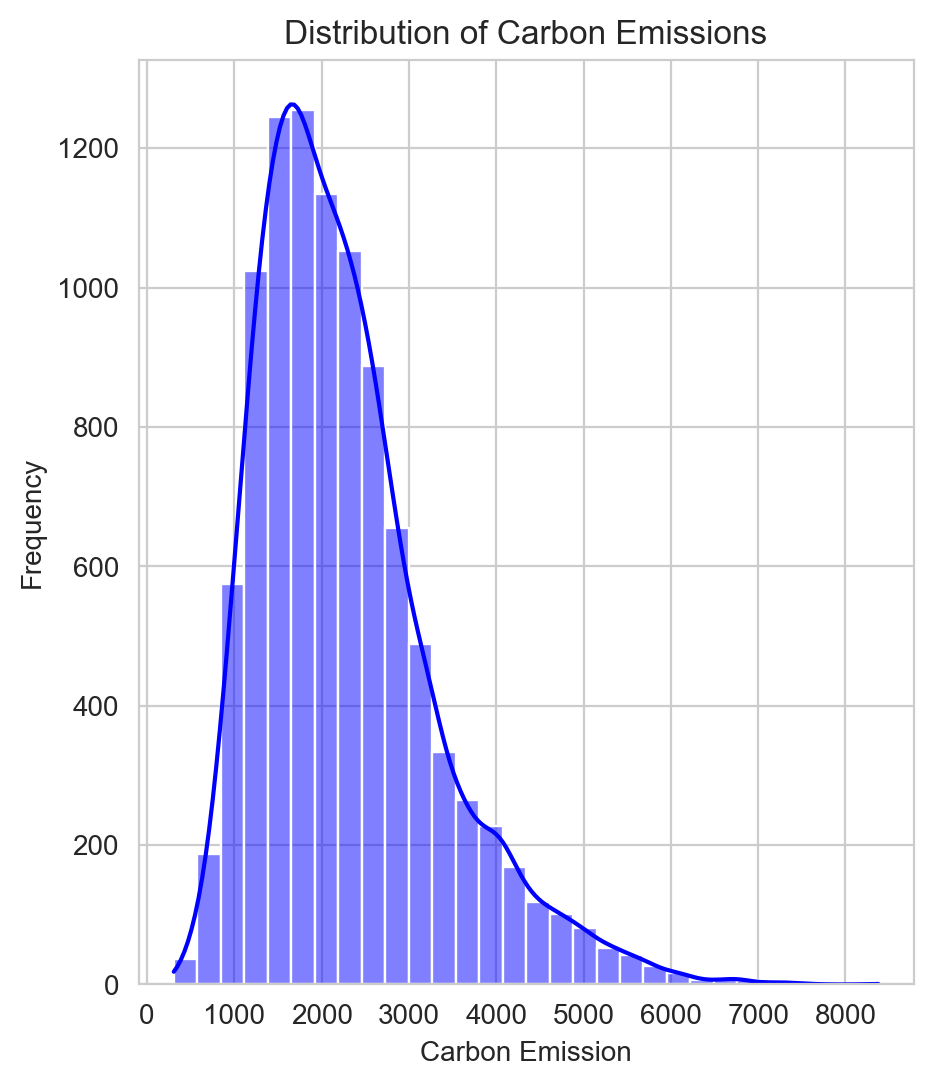

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of Carbon Emissions
plt.figure(figsize=(5, 6), dpi=200)
sns.histplot(data['carbonemission'], kde=True, color='blue', bins=30)
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Carbon Emission')
plt.ylabel('Frequency')
plt.show()

---
<br>

- ### Univariate Analysis of Categorical Features

In [66]:
grouped_data

energy_efficiency
no           7365321
sometimes    7858071
yes          7468081
Name: carbonemission, dtype: int64

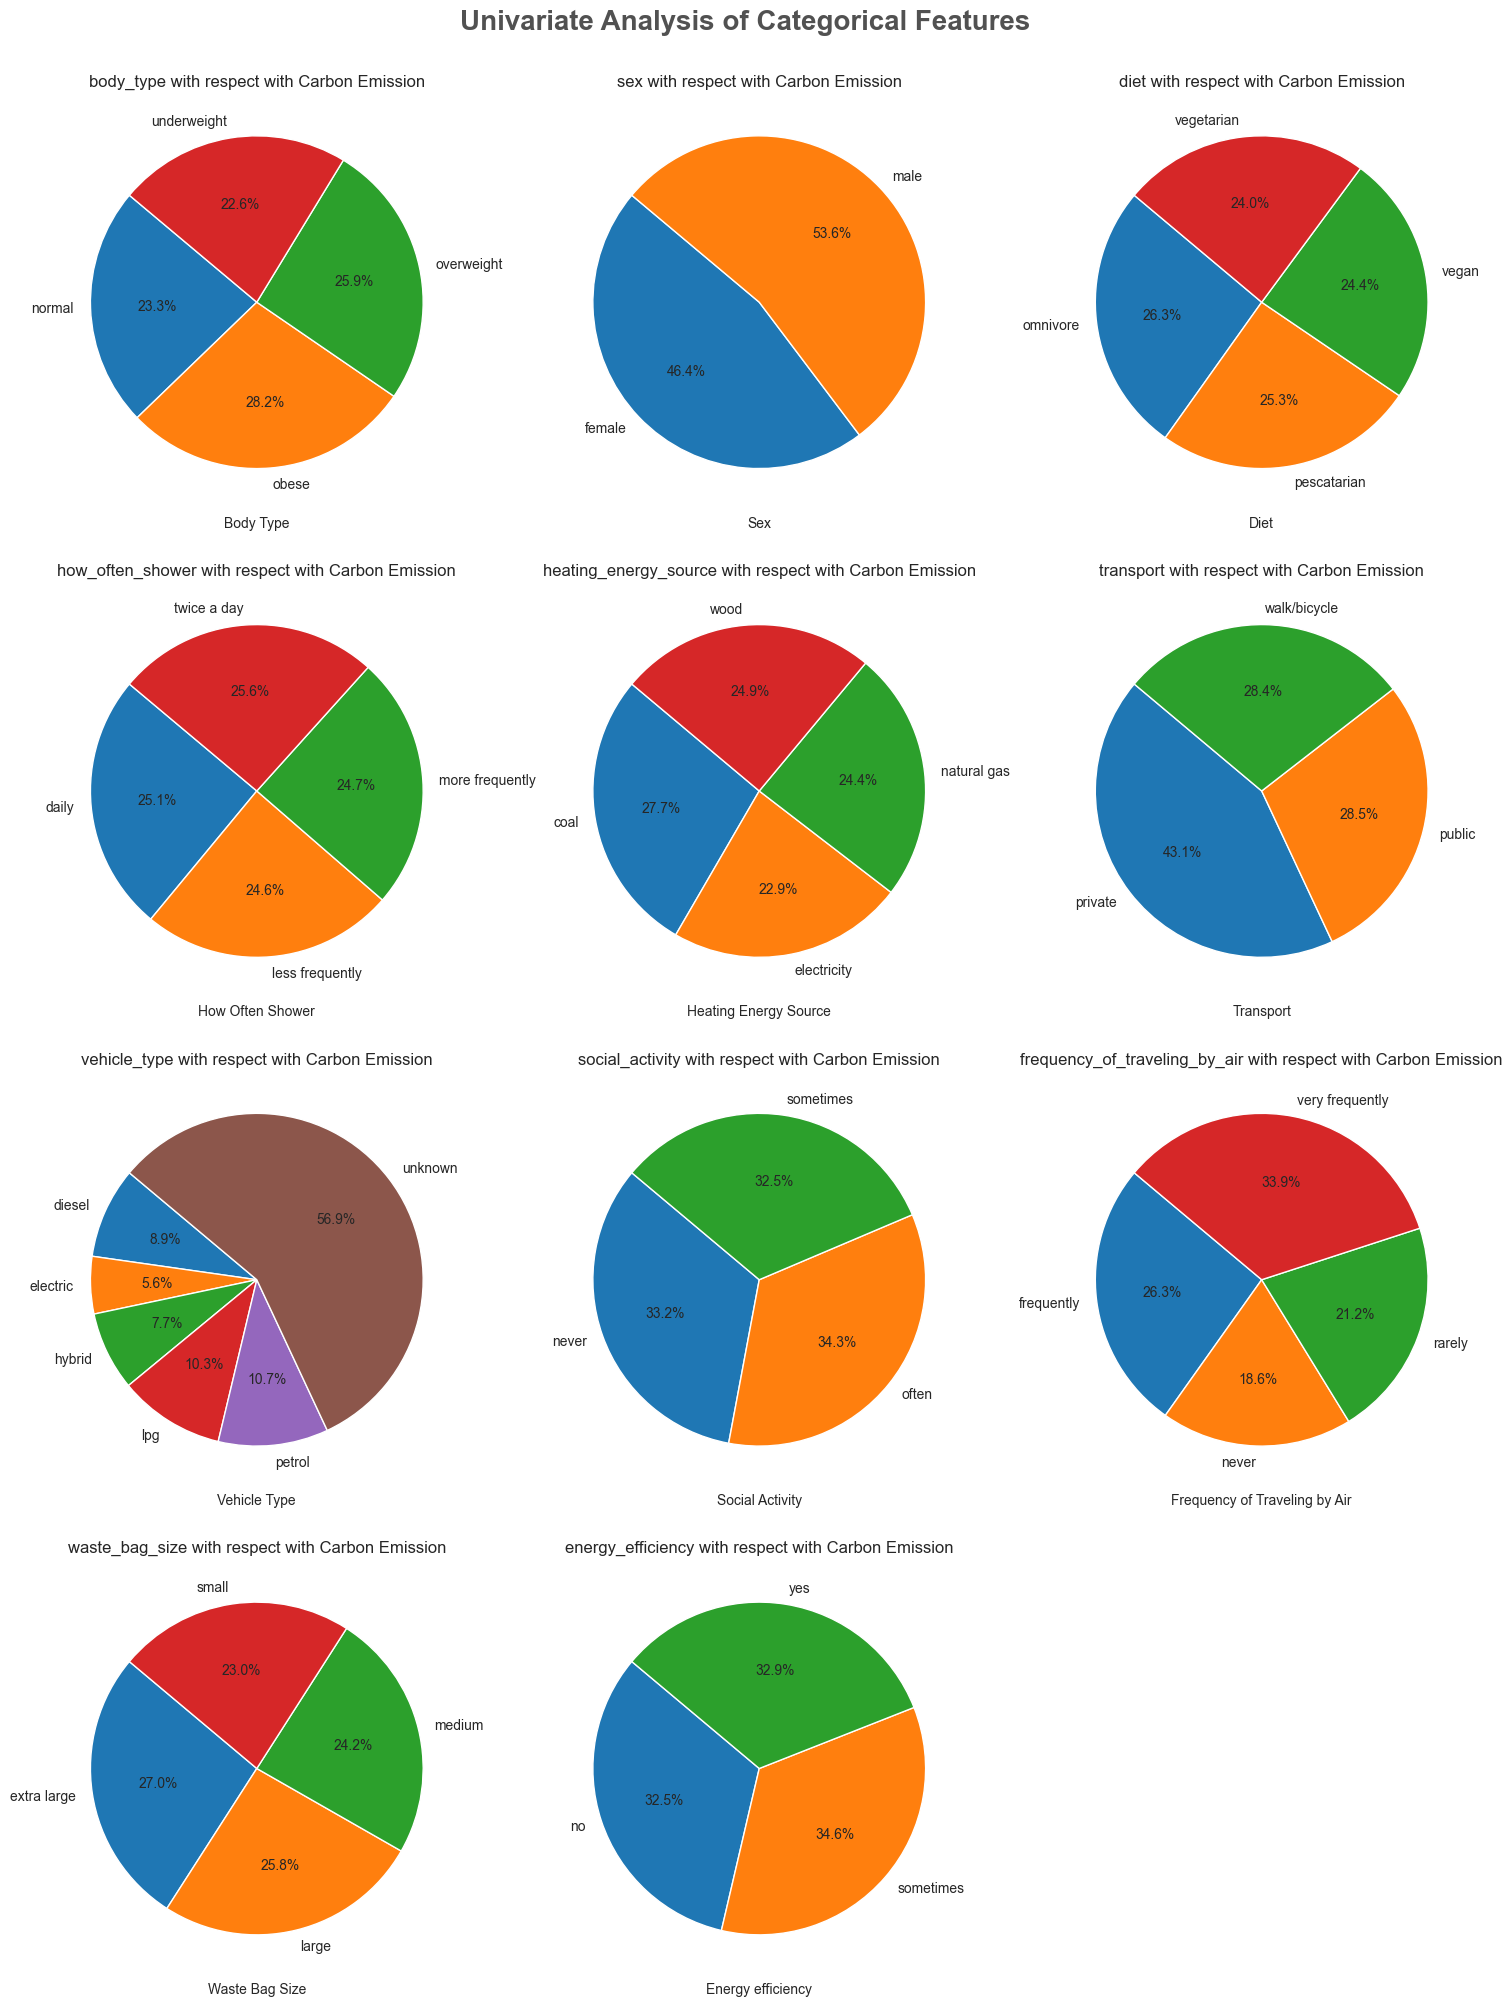

In [70]:
# categorical columns
plt.figure(figsize=(15, 25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    feature = categorical_features[i]
    plt.subplot(5, 3, i+1)
    grouped_data = data.groupby(feature)['carbonemission'].sum()

    plt.title(f'{feature} with respect with Carbon Emission')

    plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

---
<br>

- ### What is the relation between Carbon Emission, Diet and Transport Method?

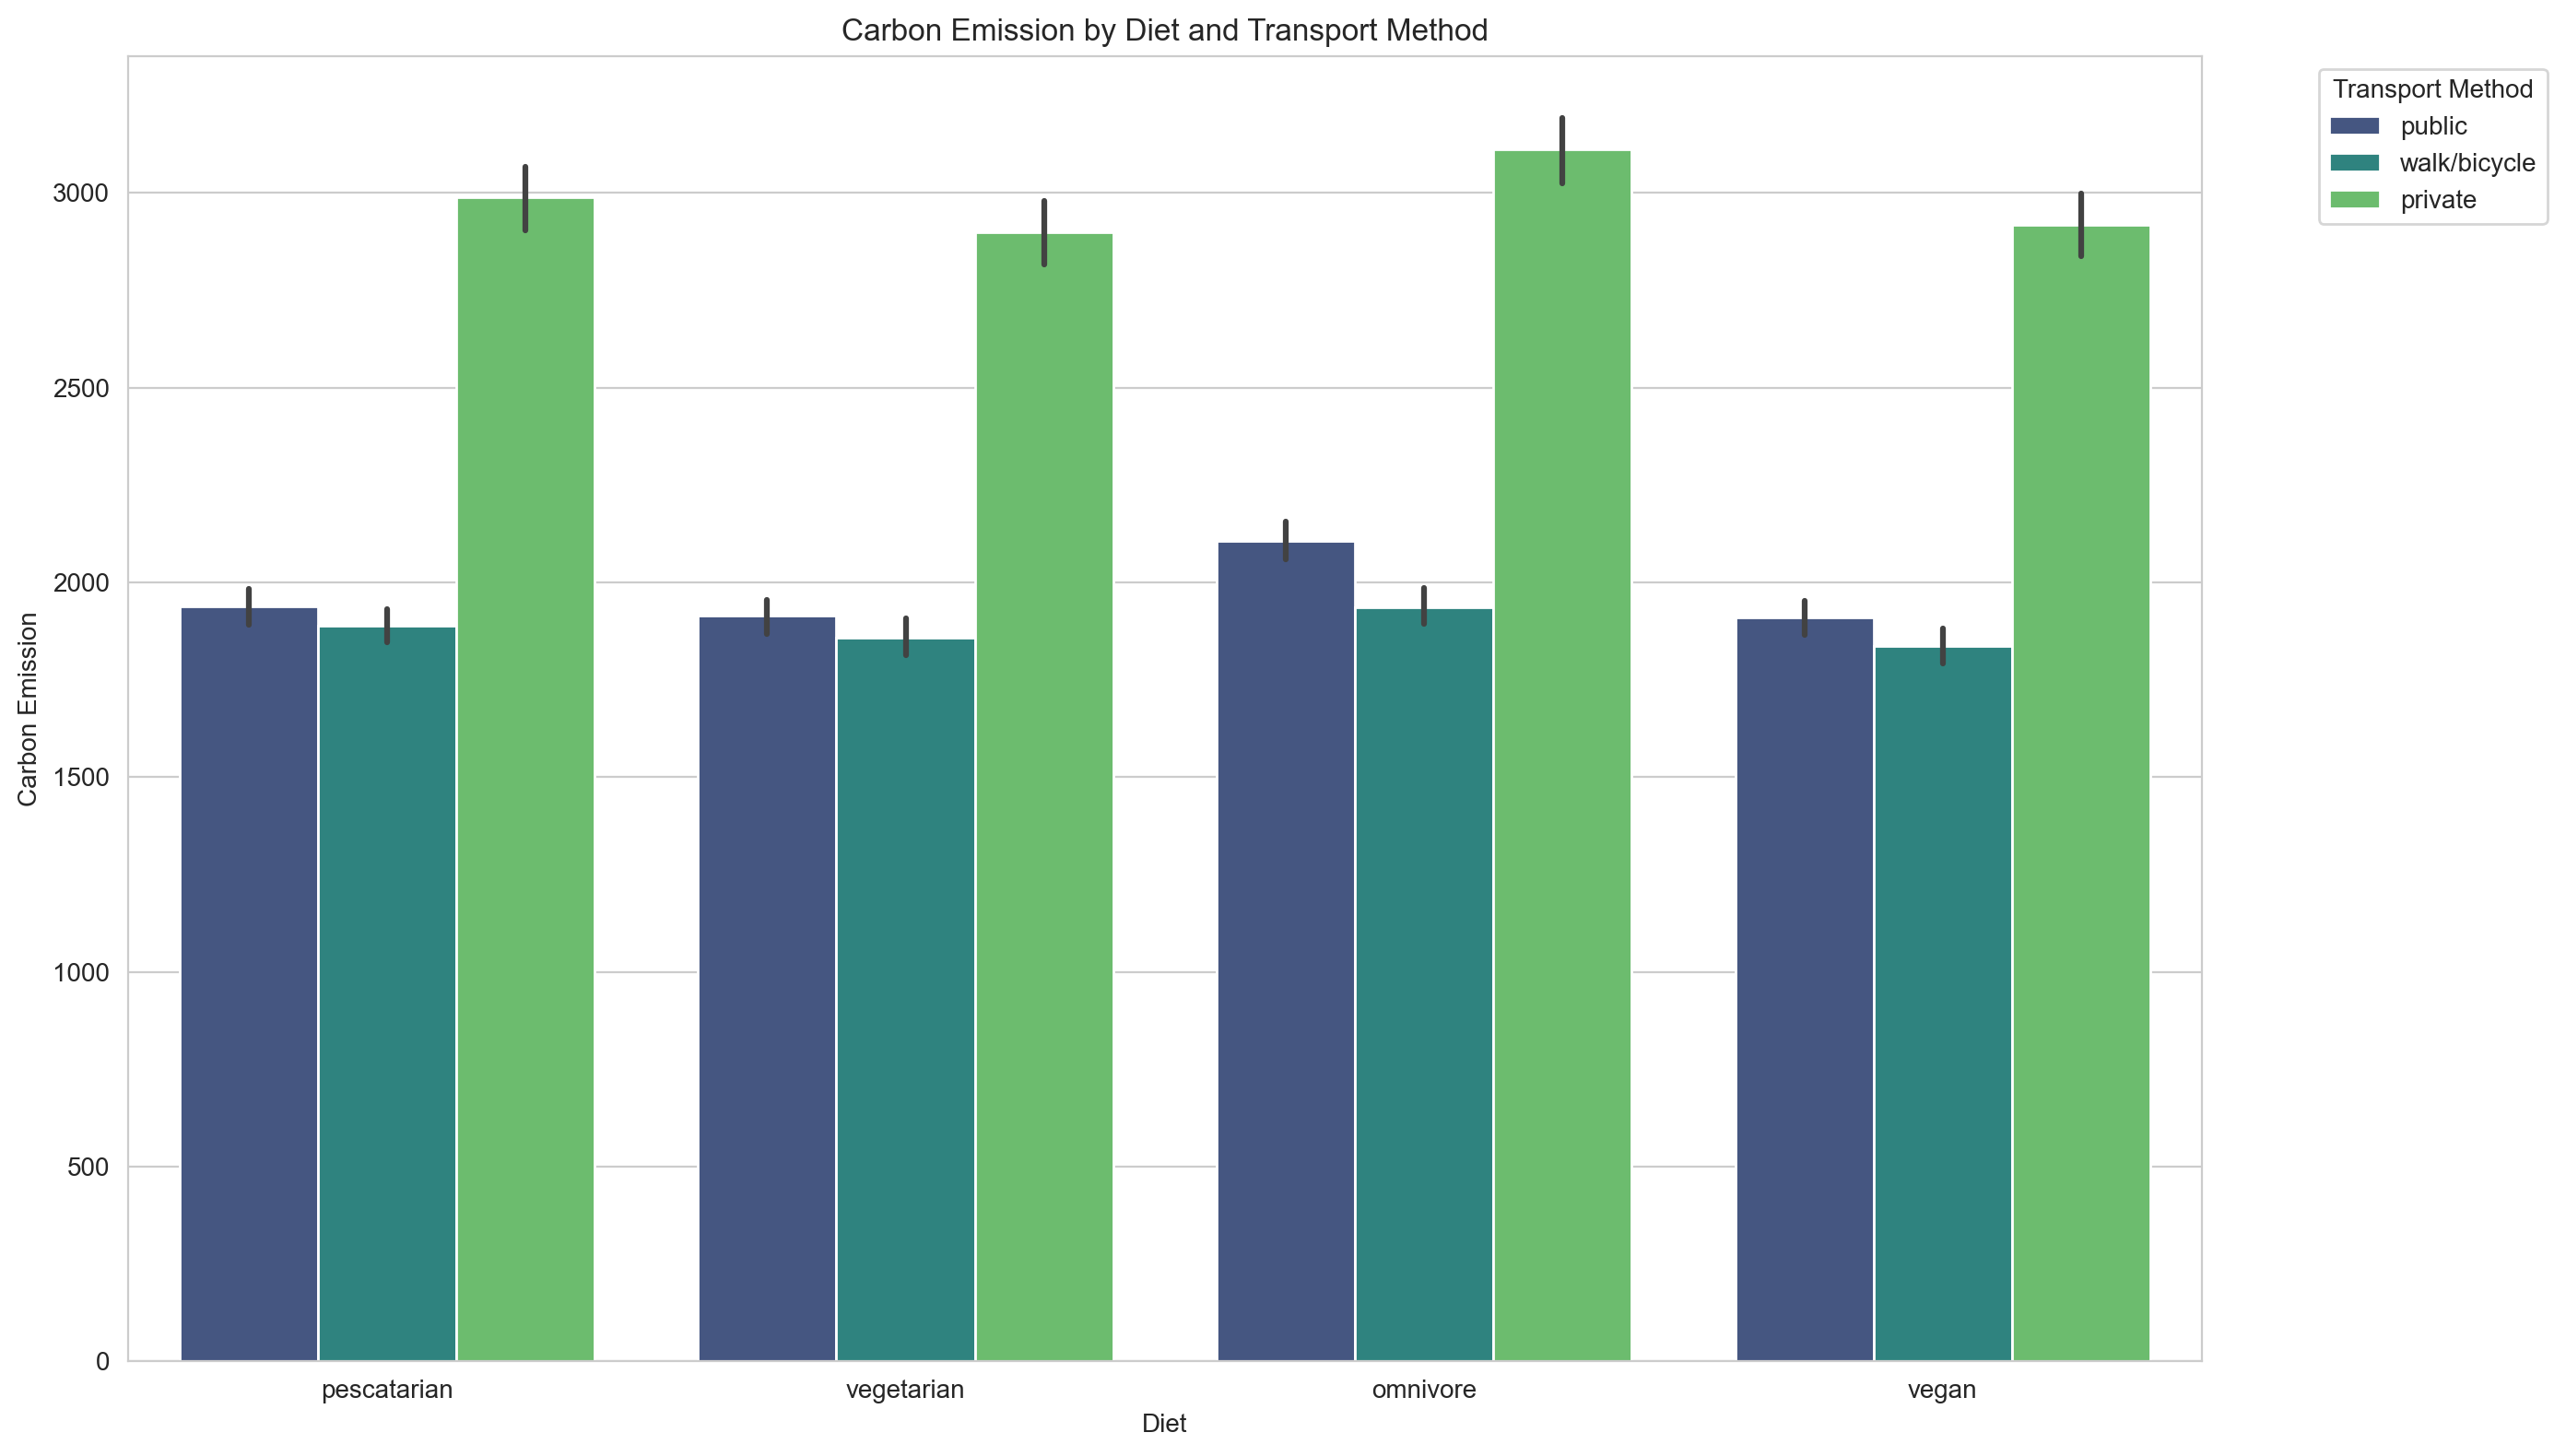

In [17]:
# Interaction between Diet and Transport Method on Carbon Emissions
plt.figure(figsize=(14, 8), dpi=200)
sns.barplot(x='diet', y='carbonemission', hue='transport', data=data, palette='viridis')
plt.title('Carbon Emission by Diet and Transport Method')
plt.xlabel('Diet')
plt.ylabel('Carbon Emission')
plt.legend(title='Transport Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---
<br>


- ### Is there a significant relationship between carbon emissions and any of the three chosen variables: vehicle monthly distance, monthly grocery bill, or waste bag weekly count?

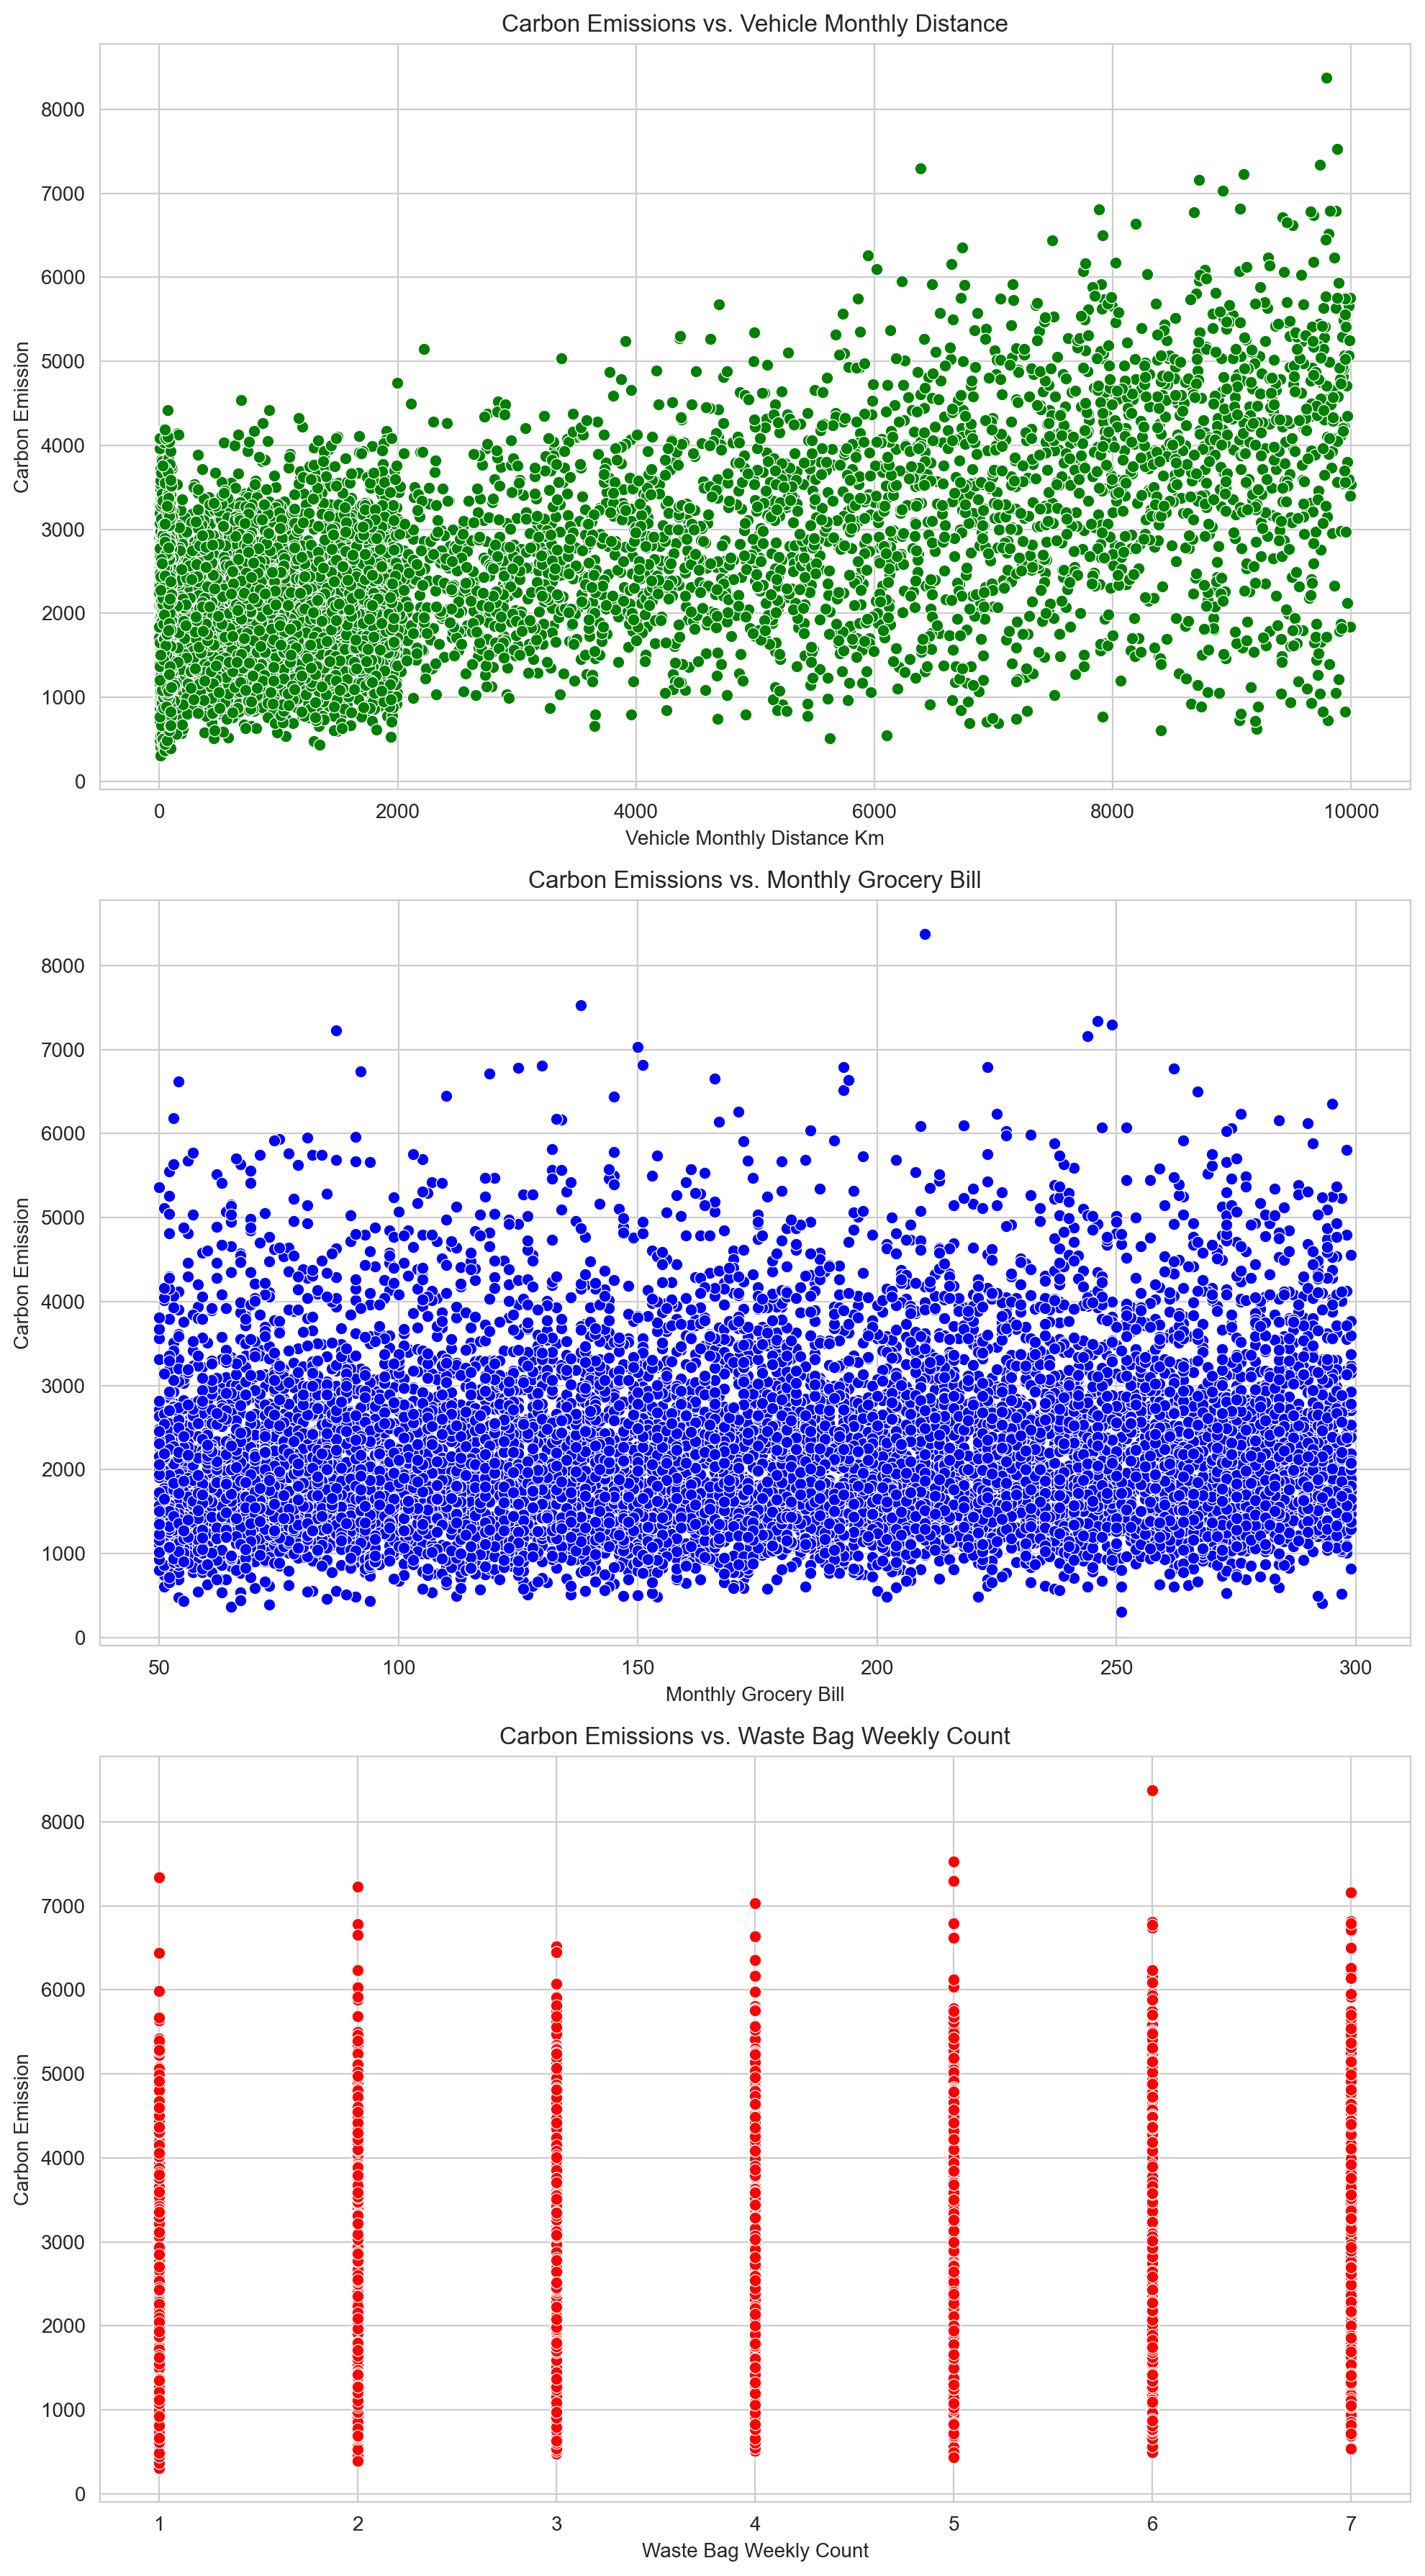

In [18]:
# Scatter plots for selected variable pairs

fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=200)

# Carbon Emissions vs. Vehicle Monthly Distance
sns.scatterplot(ax=axes[0], x='vehicle_monthly_distance_km', y='carbonemission', data=data, color='green')
axes[0].set_title('Carbon Emissions vs. Vehicle Monthly Distance')
axes[0].set_xlabel('Vehicle Monthly Distance Km')
axes[0].set_ylabel('Carbon Emission')

# Carbon Emissions vs. Monthly Grocery Bill
sns.scatterplot(ax=axes[1], x='monthly_grocery_bill', y='carbonemission', data=data, color='blue')
axes[1].set_title('Carbon Emissions vs. Monthly Grocery Bill')
axes[1].set_xlabel('Monthly Grocery Bill')
axes[1].set_ylabel('Carbon Emission')

# Carbon Emissions vs. Waste Bag Weekly Count
sns.scatterplot(ax=axes[2], x='waste_bag_weekly_count', y='carbonemission', data=data, color='red')
axes[2].set_title('Carbon Emissions vs. Waste Bag Weekly Count')
axes[2].set_xlabel('Waste Bag Weekly Count')
axes[2].set_ylabel('Carbon Emission')

plt.tight_layout()
plt.show()

---
<br>

- ### Is there a statistically significant relationship between any of the numerical features and carbon emission?

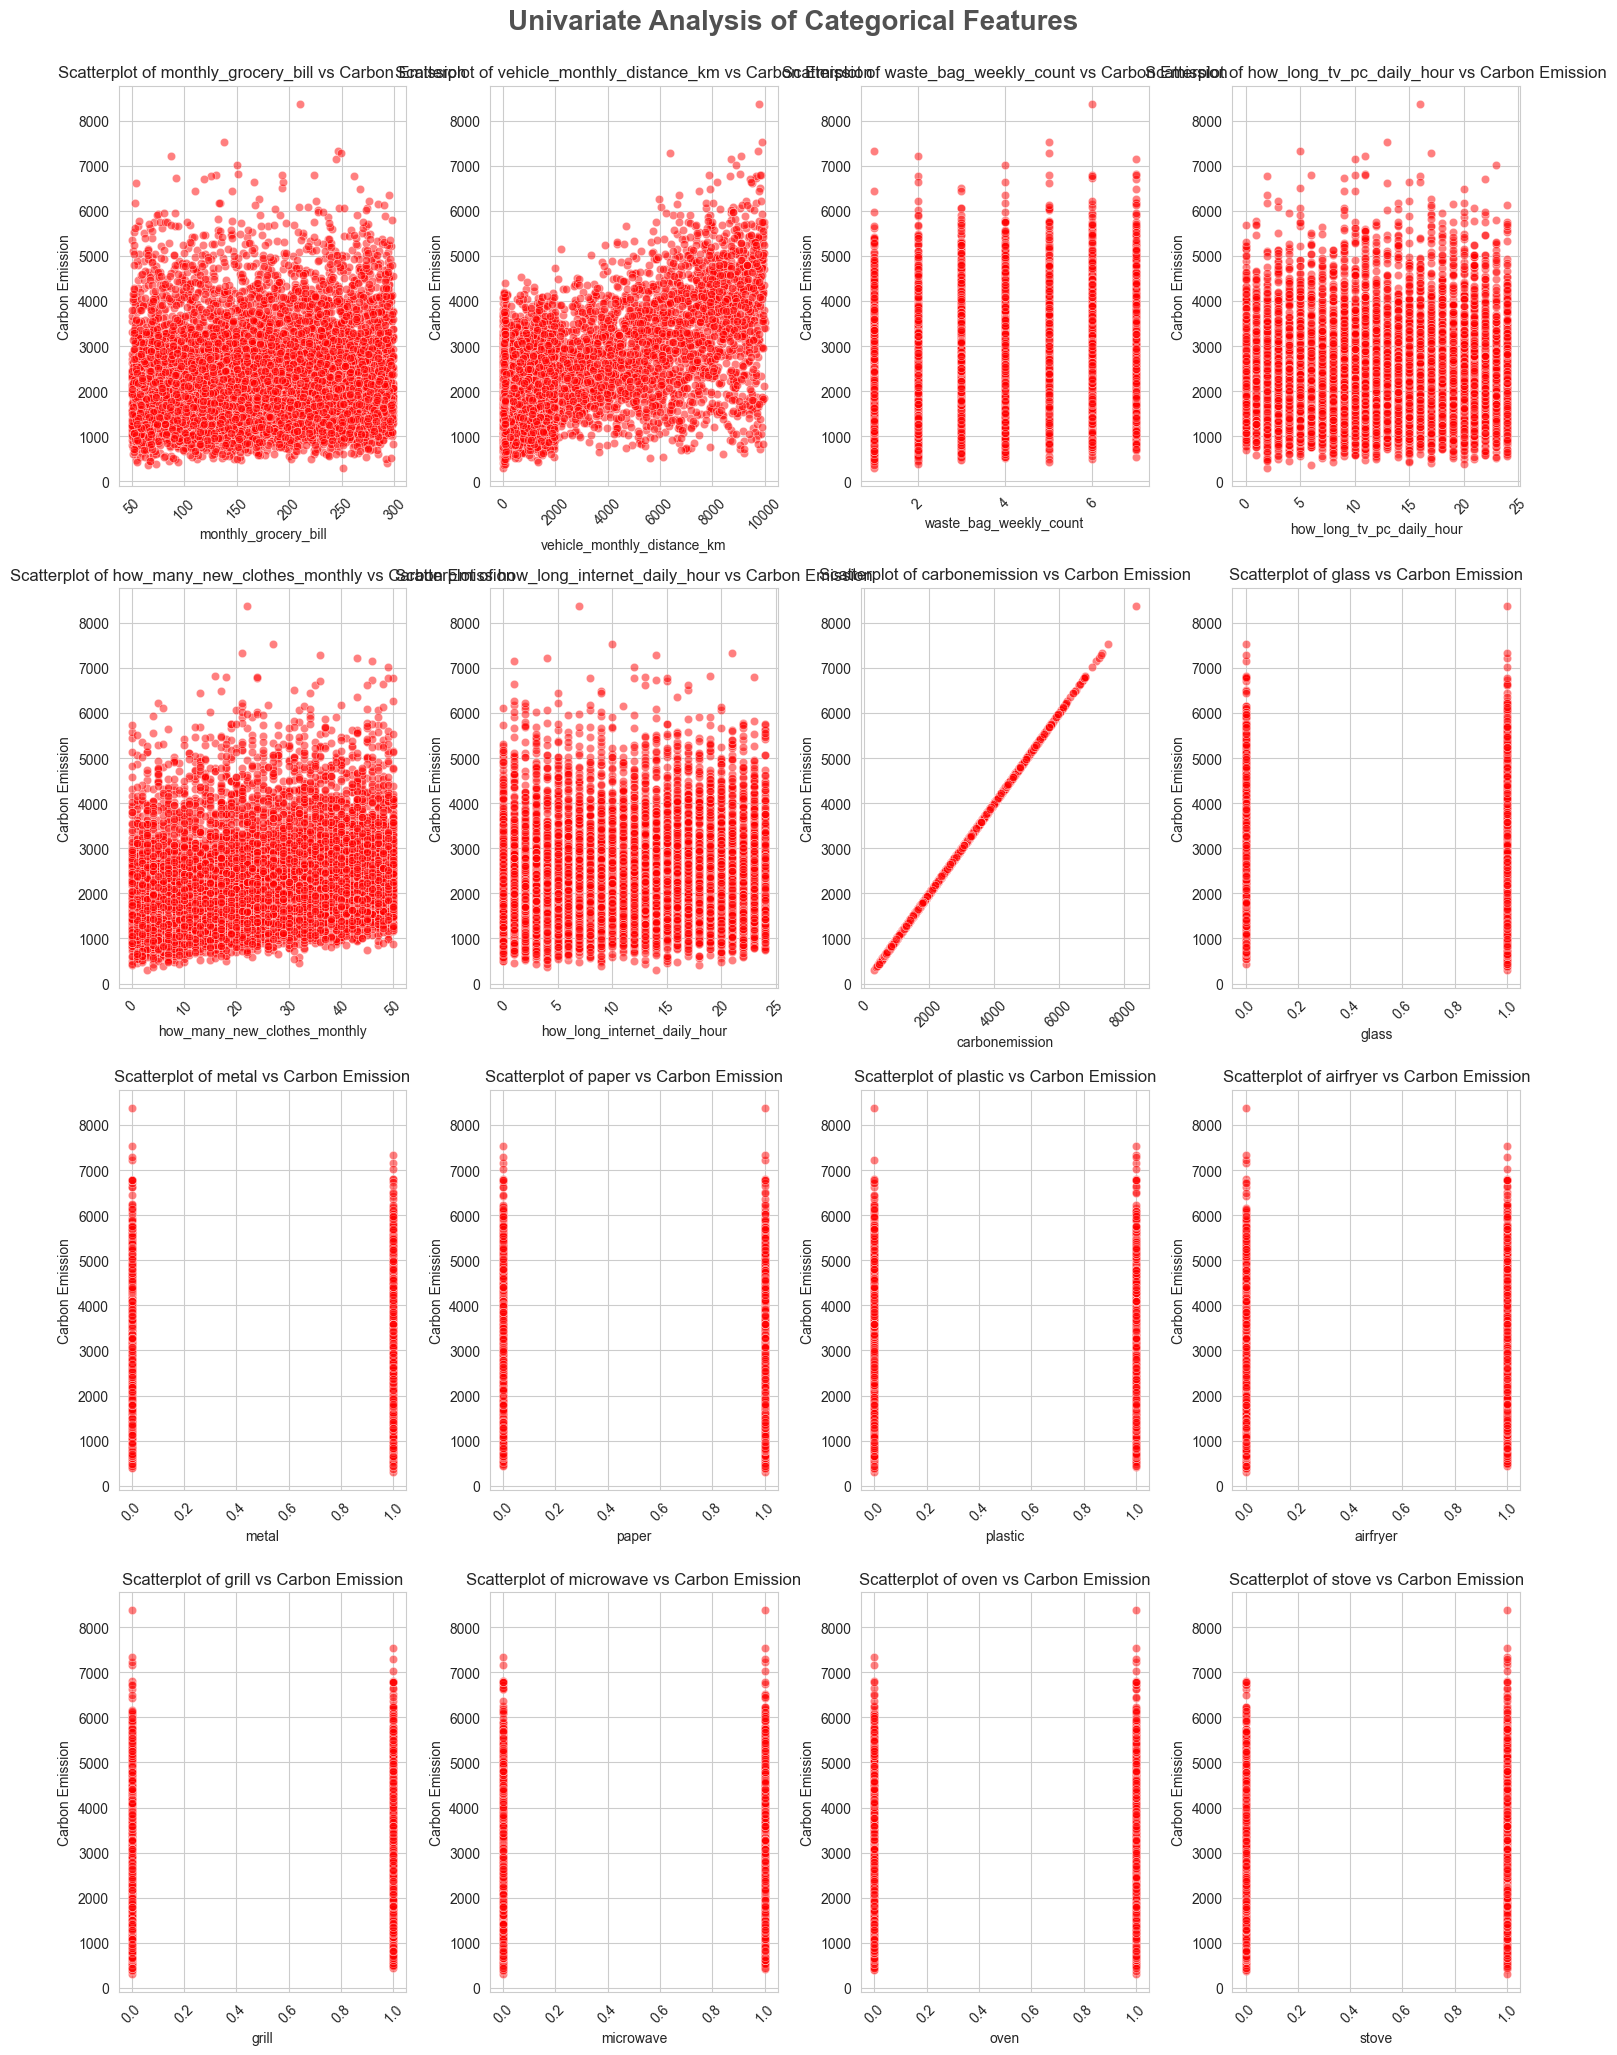

In [73]:
# categorical columns
plt.figure(figsize=(15, 25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numerical_features)):
    feature = numerical_features[i]
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=data, x=feature, y='carbonemission', alpha=0.5, color='red')
    plt.title(f'Scatterplot of {feature} vs Carbon Emission')
    plt.xlabel(numerical_features[i])
    plt.ylabel('Carbon Emission')

    plt.xticks(rotation=45)
    plt.tight_layout()

---  
<br>

- ### Are there any outliers in the carbon emissions for any specific category?  


**What are outliers?**  

In statistics, outliers are data points that significantly deviate from the rest of the data set. They exist far outside the typical range of values and can sometimes skew the overall analysis.

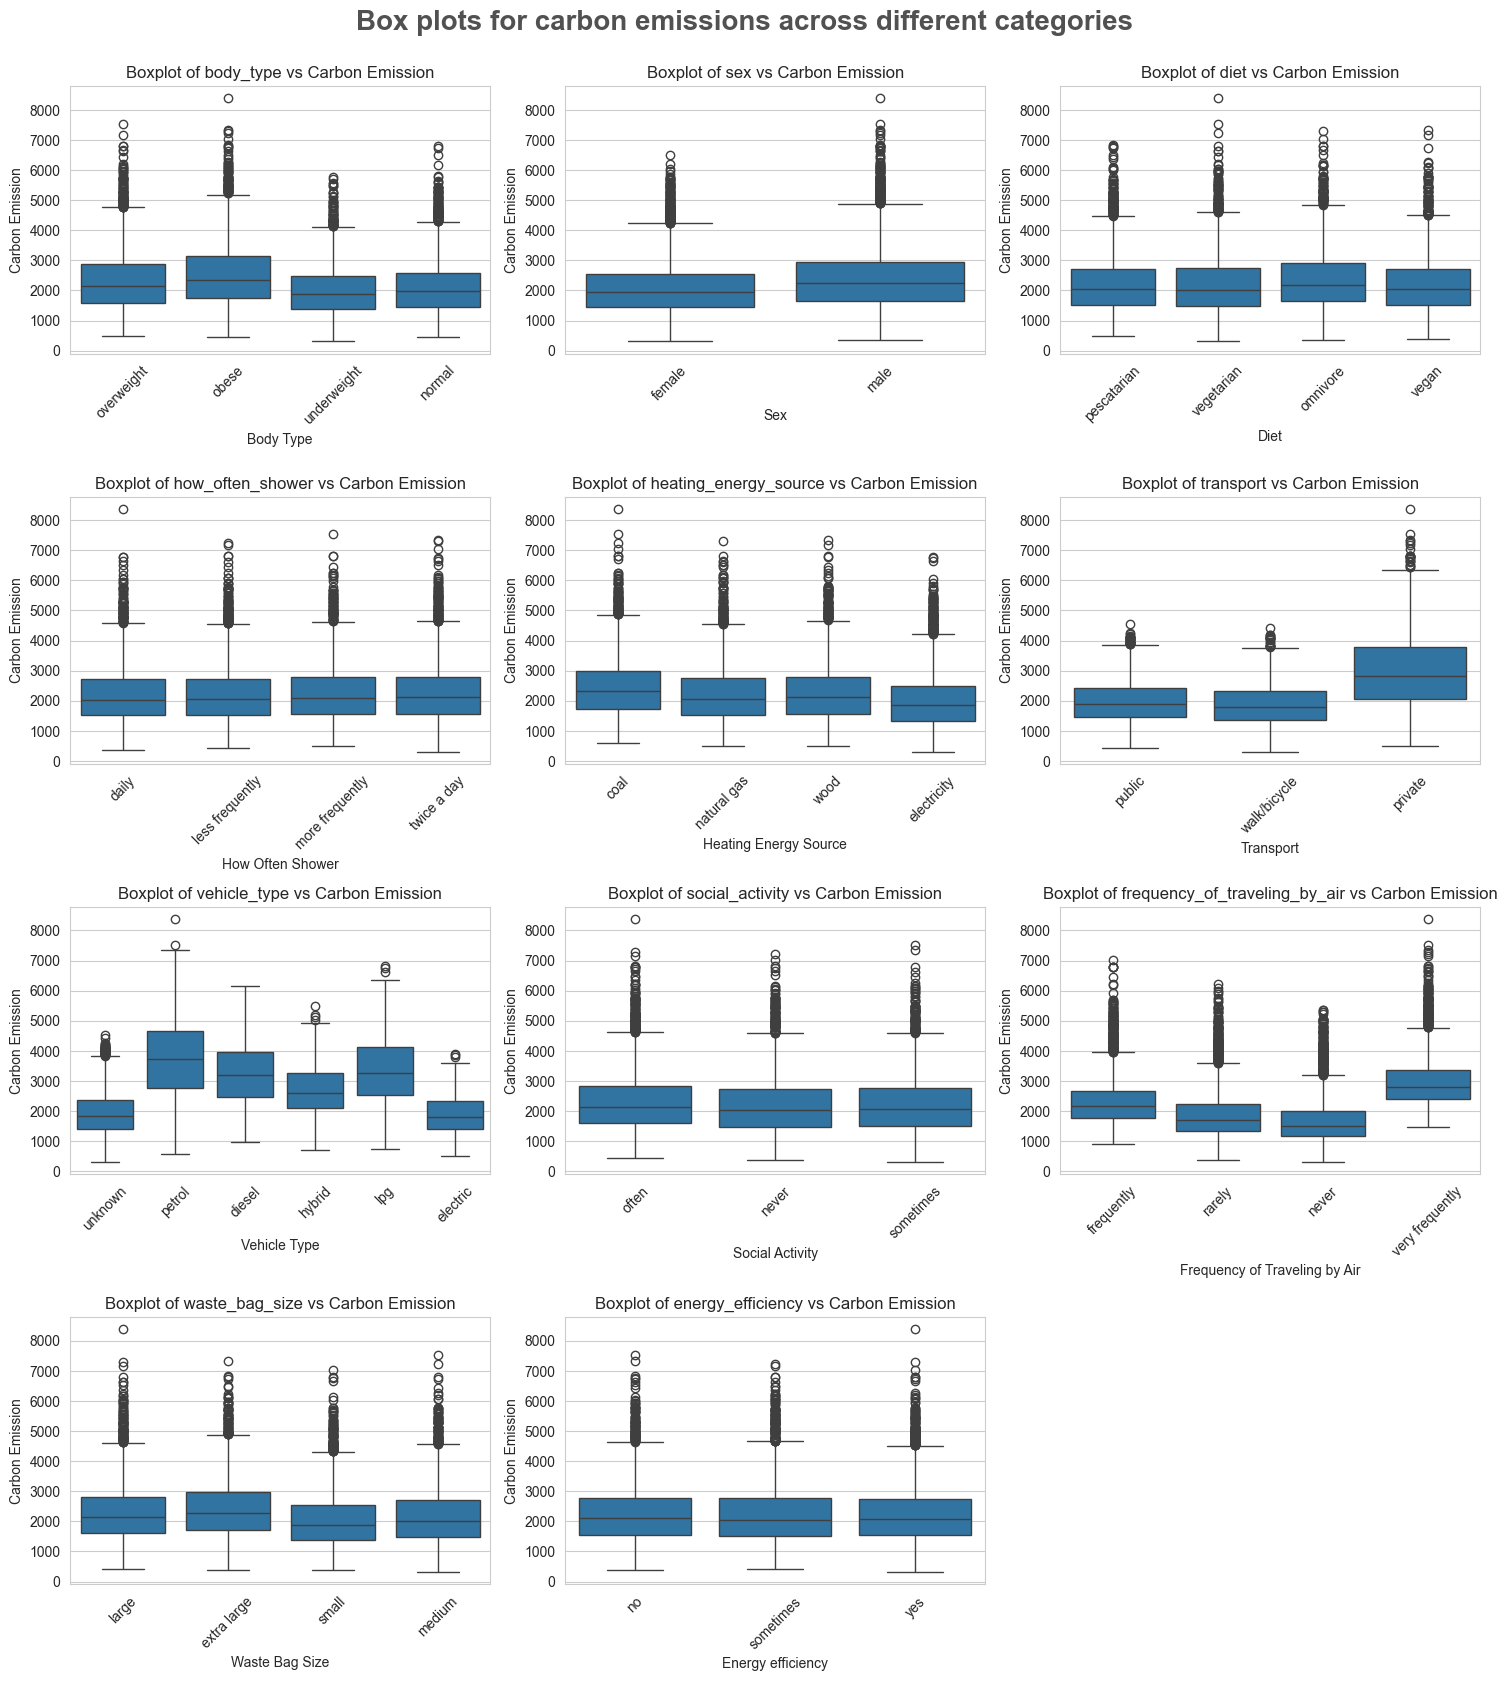

In [74]:
# categorical columns
plt.figure(figsize=(15, 20))
plt.suptitle('Box plots for carbon emissions across different categories', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    feature = categorical_features[i]
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=data, x=feature, y='carbonemission')
    plt.title(f'Boxplot of {feature} vs Carbon Emission')
    plt.xlabel(categorical_columns[i])
    plt.ylabel('Carbon Emission')
    plt.xticks(rotation=45)
    plt.tight_layout()